# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

# Challenge 1 - Explore The Dataset

In this lab, we will explore a dataset that lists benign and malicious websites. We will use the features that describe these websites to classify them.

Let's start by loading the data

In [92]:
websites = pd.read_csv('../website.csv')

#### The next step is to explore the data. 

In the cells below, examine the dataset by looking at the first five rows and examining the data types.

In [93]:
# Your code here:

websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [94]:
# Your code here

websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### The column that we are trying to predict is `Type`.

Let's examine this column by plotting a bar graph of its distribution.

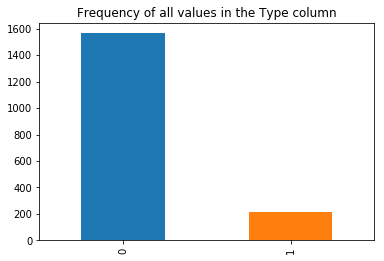

In [95]:
# Your code here:

websites.Type.value_counts().plot.bar(title = "Frequency of all values in the Type column")

We would like to examine the `APP_PACKETS` by plotting a two histograms side by side of this feature by `Type`. Do this in the cell below to see whether the distribution of this variable differs by value of `Type` and add your interpertation of the graph in a comment.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA5F85CDD8>,
      dtype=object)

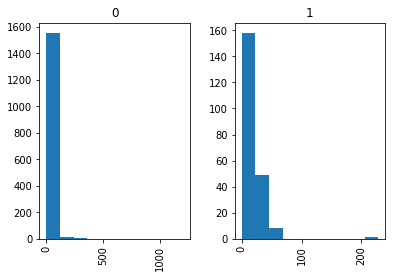

In [96]:
# Your code here:

websites.APP_PACKETS.hist(by=websites.Type)

Compute the correlation matrix for all numeric variables to determine whether some variables are highly correlated. This will help us with model selection. Add your conclusion in a comment in the cell below as well as the code to find the correlation matrix.

In [97]:
# Your code here

websites.corr()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852


There are at least three pairs of highly correlated variables (with correlation over 95%). Select one variable to remove from each pair and drop the variables using `inplace=True`.

In [98]:
# Your code here

websites.drop(columns=['REMOTE_APP_PACKETS', 'REMOTE_APP_BYTES', 'TCP_CONVERSATION_EXCHANGE'], inplace=True)

Examine the number of missing rows in each column

In [99]:
# Your code here:

websites.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
SOURCE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

Determine which columns should be removed and drop them. 

In [100]:
# Your code here:

websites.drop(columns=['CONTENT_LENGTH'], inplace=True)

If there are still columns with a handful of missing rows, drop those rows as well.

In [101]:
websites.dropna(inplace=True)

Examine the `WHOIS_COUNTRY` feature by looking at all unique values. What issue do you see with these values?

In [102]:
# Your code here:

websites.WHOIS_COUNTRY.unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Do some manual work to consolidate the duplicate countries spelled differently. Start off with Cyprus and change the country name to the country code.

In [103]:
# Your code here:

websites.WHOIS_COUNTRY[websites.WHOIS_COUNTRY == "Cyprus"] = 'CY'

c:\users\michal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Now continue with the UK. Change all variations to the country code.

In [104]:
# Your code here:
    
websites.WHOIS_COUNTRY[websites.WHOIS_COUNTRY.isin(["United Kingdom", "[u'GB'; u'UK']", "GB"])] = "GB"    

c:\users\michal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Now, fix all other lower case countries.

In [105]:
# Your code here:

websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.str.upper()

Let's look at the bar graph of all countries.

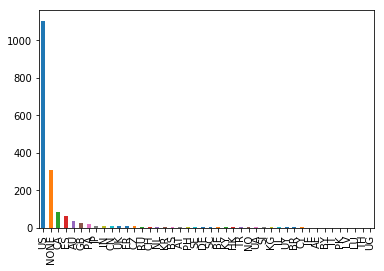

In [106]:
# Your code here:

websites.WHOIS_COUNTRY.value_counts().plot.bar()

Since we see that the majority of the data belongs to a few groups, change the feature such that we keep only the top 10 values. Label every other country not in the top 10 with `OTHER`. This is a crucial step since we intend to convert all categorical variables to dummy variables. Having a large number of sparse dummy variables makes it harder to produce good predictions.

In [107]:
# Your code here:

top10 = websites.WHOIS_COUNTRY.value_counts().index.tolist()[0:10]
websites.WHOIS_COUNTRY[~websites.WHOIS_COUNTRY.isin(top10)] = "OTHER"

c:\users\michal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Since we removed a few countries, let's remove `WHOIS_STATEPRO`. This column contains more detailed geographic information that we now no longer need.

In [108]:
websites.drop(columns=["WHOIS_STATEPRO"], inplace=True)

Now examine all the unique values for `SERVER`.

In [109]:
websites.SERVER.unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

Since the list is extremely long, let's consolidate to 4 different groups: `Apache`, `Microsoft`, `nginx`, and `other`. Do this by assigning the label `Microsoft` to any string containing this word. Do the same for `nginx` and `Apache`. Any string that does not contain one of these three substrings should be assigned the value `other`.

In [110]:
# Your code here:

websites.SERVER[websites.SERVER.str.contains("Microsoft")] = "Microsoft"
websites.SERVER[websites.SERVER.str.contains("Apache")] = "Apache"
websites.SERVER[websites.SERVER.str.contains("nginx")] = "nginx"
websites.SERVER[~websites.SERVER.str.contains('Microsoft|nginx|Apache')] = "Other"

c:\users\michal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\michal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\michal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/p

Remove any date and qualitative columns using `drop`.

In [111]:
# Your code here:

websites.drop(columns=['URL', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace=True)

In our final data exploration and cleansing step, convert all `object` columns to dummy variables. Make sure to set `drop_first=True`.

In [112]:
# Your code here:

object_cols = websites.columns.values[websites.dtypes == object]
websites_dummy = pd.get_dummies(websites, columns=object_cols, drop_first=True)

In [113]:
websites_dummy.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_NONE,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_US
0,16,7,0,2,700,9,1153,9,2.0,1,...,0,0,0,0,0,0,1,0,0,0
1,16,6,7,4,1230,17,1265,17,0.0,0,...,0,0,0,0,0,0,1,0,0,0
2,16,6,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
3,17,6,22,3,3812,39,18784,39,8.0,0,...,0,0,0,0,0,0,0,0,0,1
4,17,6,2,5,4278,61,129889,61,4.0,0,...,0,0,0,0,0,0,0,0,0,1


# Challenge 2 - Creating the Model

We'll start off this section by splitting the data to train and test. Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.

In [121]:
# Your import here:

from sklearn.model_selection import train_test_split

# Your code here:

cols = [x for x in websites_dummy.columns.values if x!= "Type"]
X_train, X_test, y_train, y_test = train_test_split(websites_dummy[cols], websites_dummy.Type, test_size=0.2)

#### For this lab, we will opt to use SVM. 

Support Vector Machines, or SVM, is an algorithm that aims to draw a line or a plane between the two groups such that they are linearly separable and the distance from the observations of each group to the line or plane is maximized. The goal of the algorithm is to find the line or plane that separates the groups. You can read more about this algorithm [here](https://en.wikipedia.org/wiki/Support_vector_machine).

In the next cell, import the necessary function and initialize your model. Set `probability=True`.

In [122]:
# Your import here:

from sklearn import svm

# Your code here:

website_svm = svm.SVC(probability=True)

Now we would like to fit the model using our training data.

In [123]:
# Your code here:

website_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Compute `y_pred` using the `X_test` data.

In [124]:
y_pred = website_svm.predict(X_test)

For this model, let's import the accuracy metric from sklearn and compute the accuracy score. This score tells us how often our classifier is correct.

In [125]:
# Your import here:

from sklearn import metrics

# Your code here:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9213483146067416


#### An interesting visual tool to examine the accuracy of our classification algorithm is to plot the ROC curve. 

ROC = Receiver operating characteristic. You can read more about ROC curves [here](https://en.wikipedia.org/wiki/Receiver_operating_characteristic). When we plot an ROC curve, our goal is to have an area under the curve that is as close as possible to 1. If we have an area that is close to the area under the x=y line, this means that our prediction algorithm will classify correctly only about 50% of the time. With this type of prediction, we are better off flipping a coin than using our algorithm.

Plot the ROC curve in the cell below.

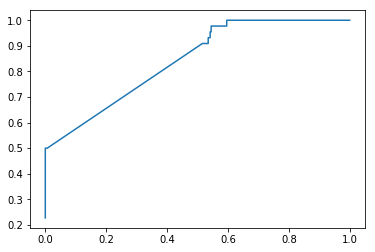

In [126]:
import matplotlib.pyplot as plt

y_pred_proba = website_svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr)

# Bonus Challenge - Variable Transformation

Consider all numeric variables. We can scale the variables such that they will now range between -1 and 1. This will reduce the influence of variables that have a very large range. By doing this, we are now giving more significance to outliers.

In the bonus challenge:
    
1. Identify outliers and either introduce a ceiling or remove those rows.
2. Scale the variables to between -1 and 1 using sklearn functions.
3. Redo the model using this transformed data